# **PLQY_individual**

_by Felix Eickemeyer_

Calculation of PLQY for each sample.

In [38]:
import warnings

import thot

from FTE_analysis_libraries import PLQY as lqy
from FTE_analysis_libraries import Spectrum as spc
from FTE_analysis_libraries.General import f1240, Vsq, V_loss, QFLS

In [39]:
# Initializes Thot project
# db = thotThotProject(dev_root = 'PLQY_results')
db = thot.ThotProject(dev_root = '../haizhou-temperature_coefficients')
root = db.find_container({'_id': db.root})

In [40]:
# get sample type

if 'sample_type' in root.metadata:
    which_sample = root.metadata['sample_type']

else:
    # default sample type
    # which_sample = 'Haizhou-FAPbI3'
    which_sample = 'FAPbI3'

    # DSC
    # which_sample = 'Yameng DSC'
    # which_sample = 'dye on TiO2'
    # which_sample = 'dye on Al2O3'
    # which_sample = 'Coumarin 153'
    # which_sample = 'MS5'
    # which_sample = 'XY1b'

param = lqy.exp_param(
    which_sample = which_sample,
    excitation_laser = None,
    PL_left = None,
    PL_right = None,
    PL_peak = None,
    corr_offs_left = 40,
    corr_offs_right = 50,
    PL_peak_auto = False,
    eval_Pb = False
)

In [41]:
samples = db.find_assets({'type' : 'calibrated PL spectrum'})
names = list({sample.metadata['name'] for sample in samples})
if 'no sample' not in names:
    raise RuntimeError('No sample data not found.')

names.remove('no sample')
if 'exclude' in root.metadata:
    for exc in root.metadata[ 'exclude' ]:
        names.remove(exc)

if db.dev_mode():
    print(names)

['g-1', 'm-2', 'g-2', 'fto-3ga', 'm-1', 'fto-2id']


In [42]:
La = lqy.find(
    {'metadata.name': 'no sample', 'metadata.em_filter': param.laser_marker},
    samples,
    show_details = (True and db.dev_mode())
)

Pa = lqy.find(
    {'metadata.name': 'no sample', 'metadata.em_filter': param.PL_marker},
    samples,
    show_details = (True and db.dev_mode())
)

no sample--ip_laser--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_650BPF.csv
no sample--ip_laser--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_700LPF.csv



0 ____________________________
g-1
g-1--ip_outofbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_650BPF.csv
g-1--ip_inbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_650BPF.csv
g-1--ip_outofbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_700LPF.csv
g-1--ip_inbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_700LPF.csv
g-1--fs--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_700LPF.csv


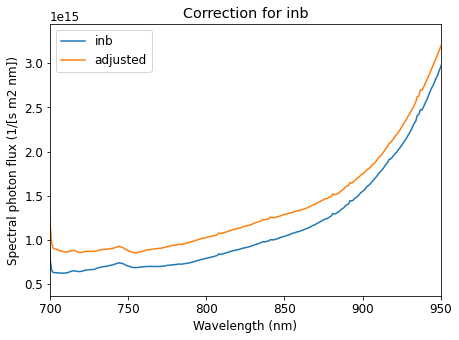

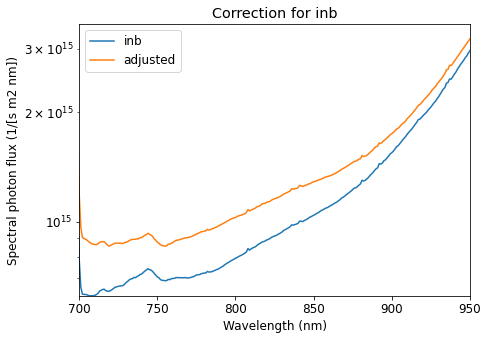

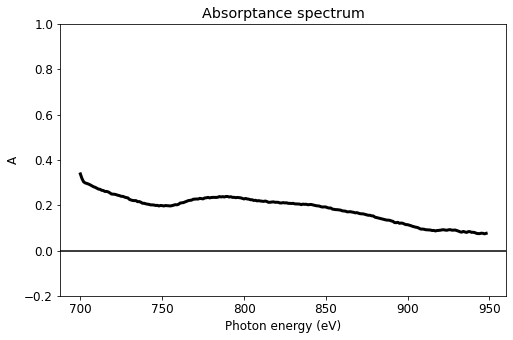

The inbeam/outofbeam adjust factor is 2.11e+01


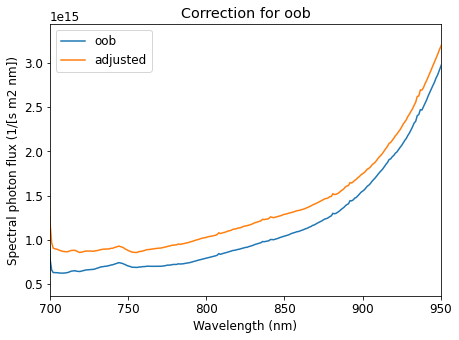

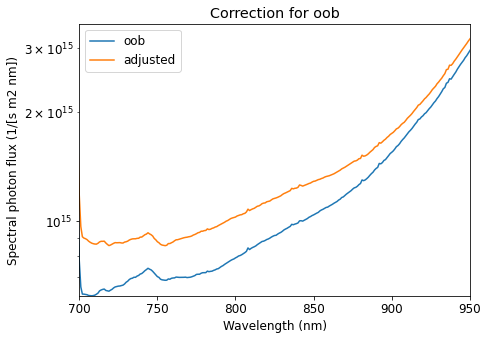

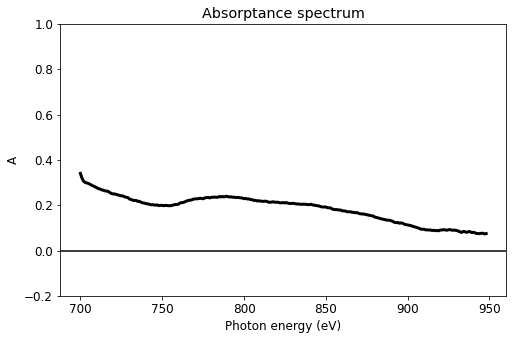

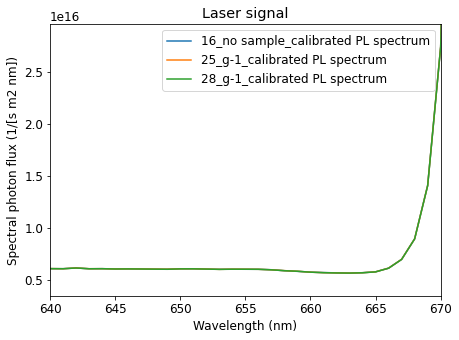

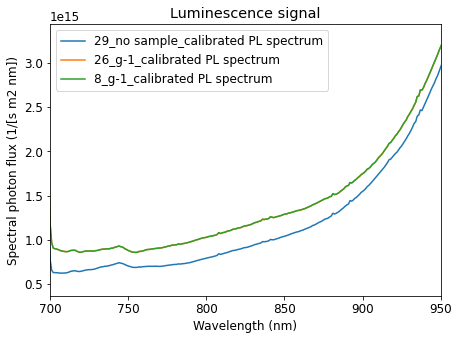

La = 2.02e+17 1/(s m2)
Lb = 2.02e+17 1/(s m2)
Lc = 2.01e+17 1/(s m2)
Pa = 0.00e+00 1/(s m2)
Pb = 3.39e+17 1/(s m2)
Pc = 3.40e+17 1/(s m2)
A = 1 - Lc/Lb = 0.1 %
PLQY = (Pc - (1 - A) * Pb) / (La * A) = 3.20e+00

1 ____________________________
m-2
m-2--ip_outofbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_650BPF.csv
m-2--ip_inbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_650BPF.csv
m-2--ip_outofbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_700LPF.csv
m-2--ip_inbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_700LPF.csv
m-2--fs--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_700LPF.csv


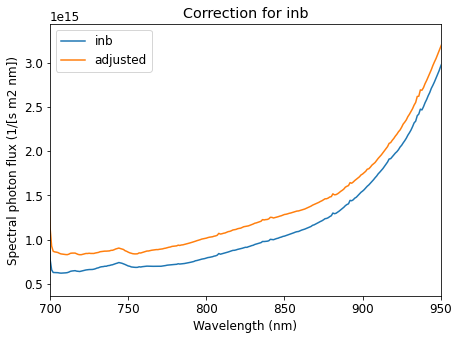

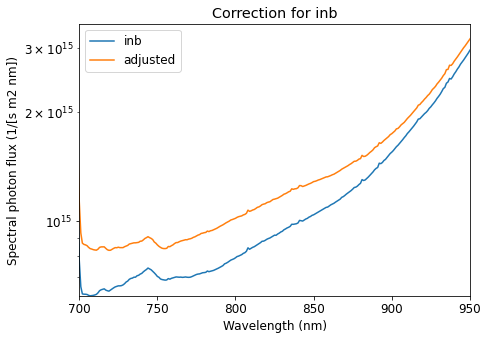

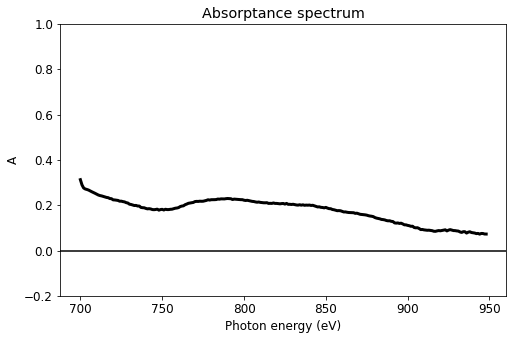

The inbeam/outofbeam adjust factor is 2.12e+01


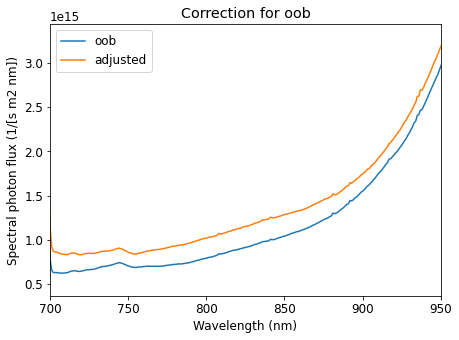

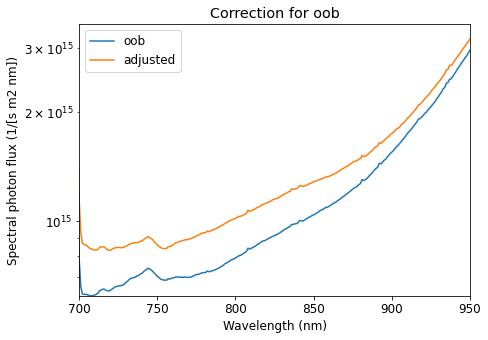

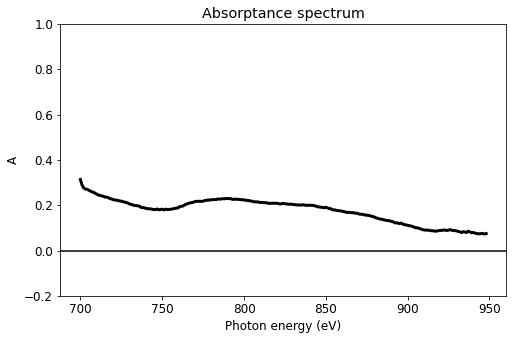

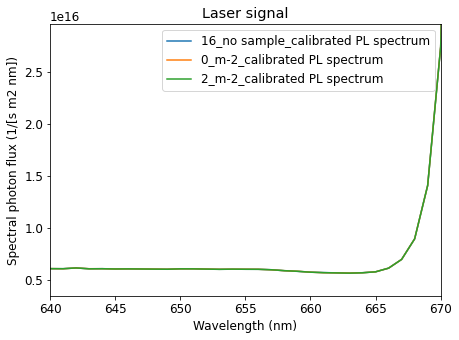

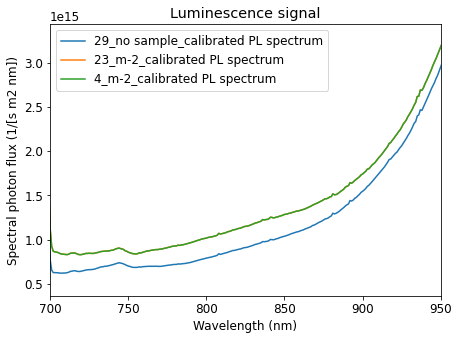

La = 2.02e+17 1/(s m2)
Lb = 2.02e+17 1/(s m2)
Lc = 2.02e+17 1/(s m2)
Pa = 0.00e+00 1/(s m2)
Pb = 3.37e+17 1/(s m2)
Pc = 3.37e+17 1/(s m2)
A = 1 - Lc/Lb = 0.0 %
PLQY = (Pc - (1 - A) * Pb) / (La * A) = -2.66e-01


/home/brian/Dropbox/Documents/School/EPFL/research/plqy_analysis/analysis/FTE-analysis-libraries-main/FTE_analysis_libraries/General.py:186: RuntimeWarning: invalid value encountered in log
  return k * T_RT / q * np.log(PLQY)



2 ____________________________
g-2
g-2--ip_outofbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_650BPF.csv
g-2--ip_inbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_650BPF.csv
g-2--ip_outofbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_700LPF.csv
g-2--ip_inbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_700LPF.csv
g-2--fs--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_700LPF.csv


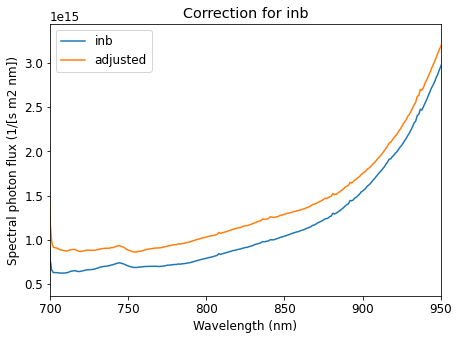

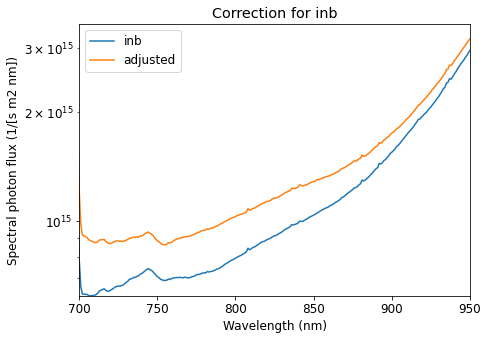

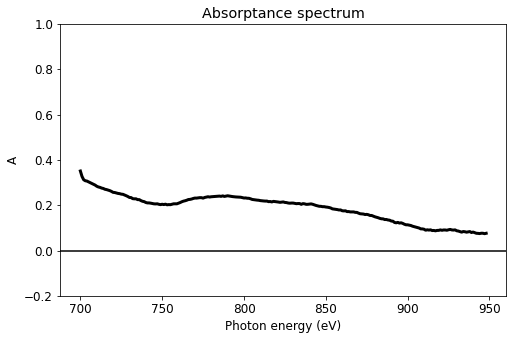

The inbeam/outofbeam adjust factor is 2.10e+01


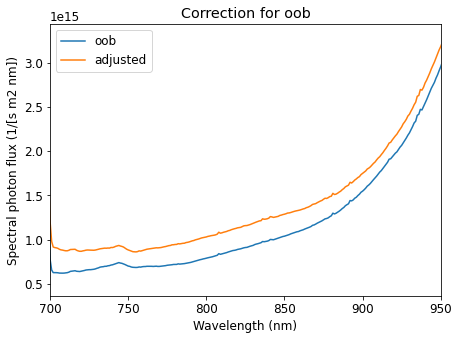

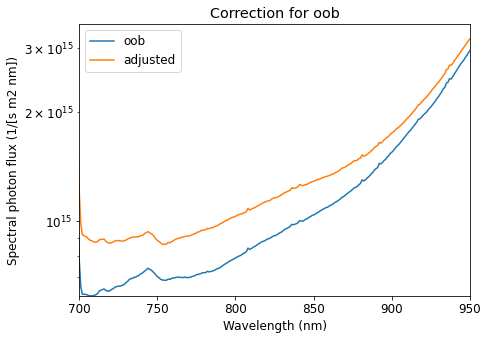

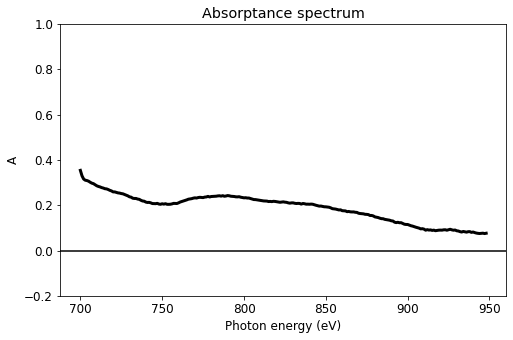

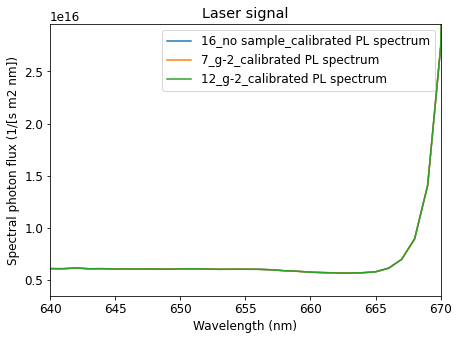

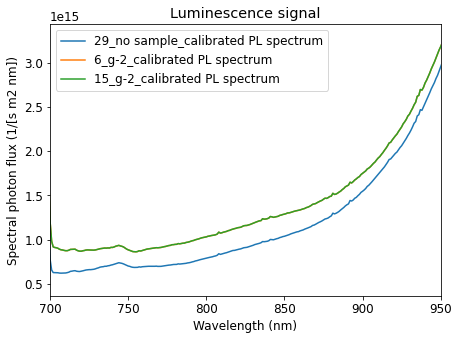

La = 2.02e+17 1/(s m2)
Lb = 2.02e+17 1/(s m2)
Lc = 2.02e+17 1/(s m2)
Pa = 0.00e+00 1/(s m2)
Pb = 3.40e+17 1/(s m2)
Pc = 3.40e+17 1/(s m2)
A = 1 - Lc/Lb = 0.1 %
PLQY = (Pc - (1 - A) * Pb) / (La * A) = 2.62e+00

3 ____________________________
fto-3ga
fto-3ga--ip_outofbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_650BPF.csv
fto-3ga--ip_inbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_650BPF.csv
fto-3ga--ip_outofbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_700LPF.csv
fto-3ga--ip_inbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_700LPF.csv
fto-3ga--fs--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_700LPF.csv


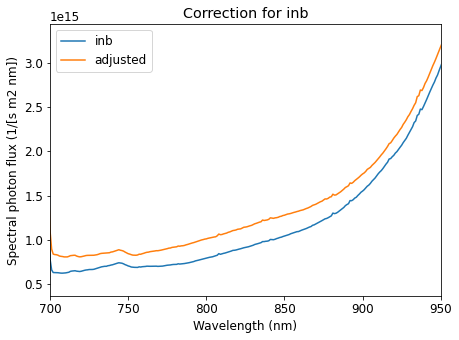

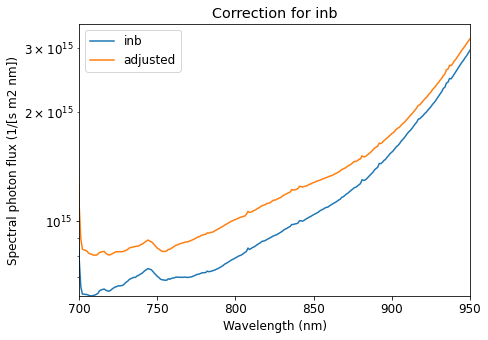

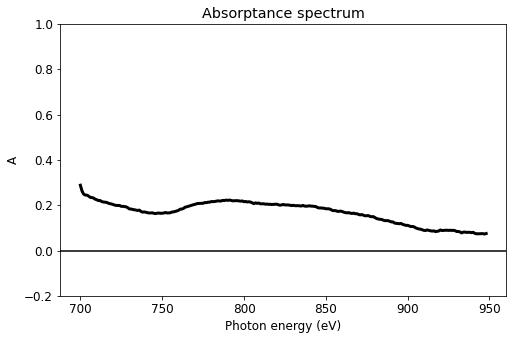

The inbeam/outofbeam adjust factor is 2.12e+01


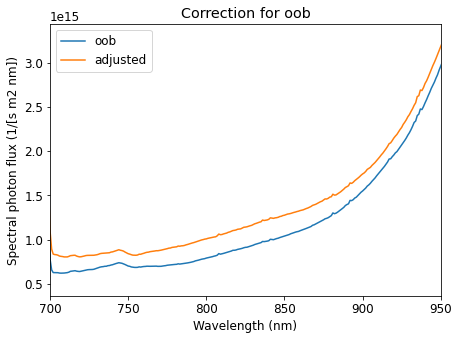

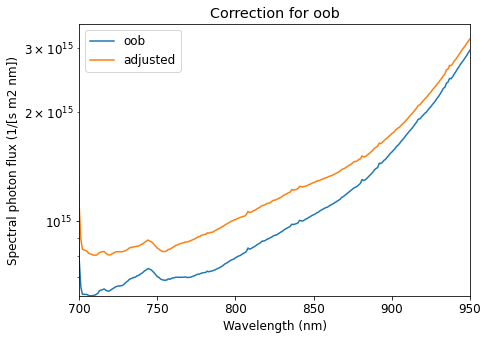

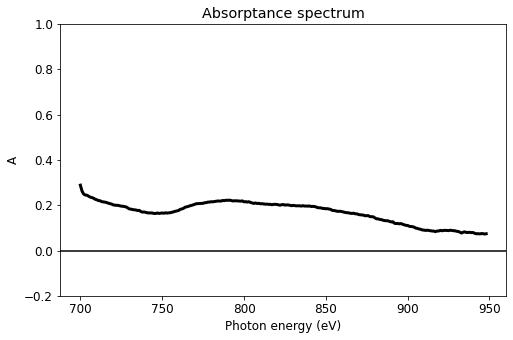

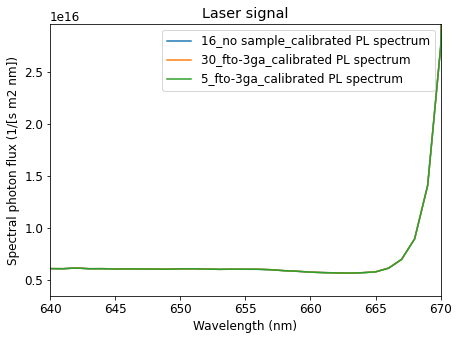

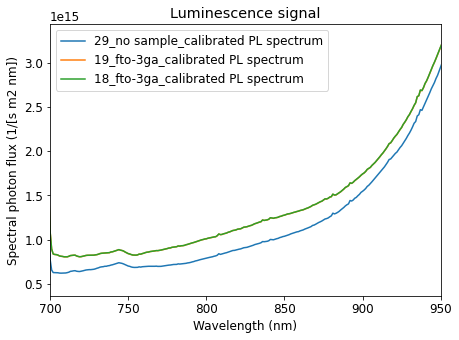

La = 2.02e+17 1/(s m2)
Lb = 2.02e+17 1/(s m2)
Lc = 2.02e+17 1/(s m2)
Pa = 0.00e+00 1/(s m2)
Pb = 3.34e+17 1/(s m2)
Pc = 3.35e+17 1/(s m2)
A = 1 - Lc/Lb = 0.1 %
PLQY = (Pc - (1 - A) * Pb) / (La * A) = 4.12e+00

4 ____________________________
m-1
m-1--ip_outofbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_650BPF.csv
m-1--ip_inbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_650BPF.csv
m-1--ip_outofbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_700LPF.csv
m-1--ip_inbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_700LPF.csv
m-1--fs--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_700LPF.csv


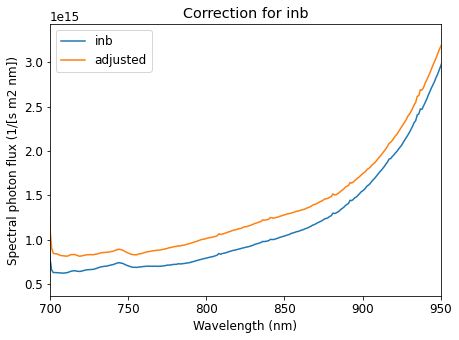

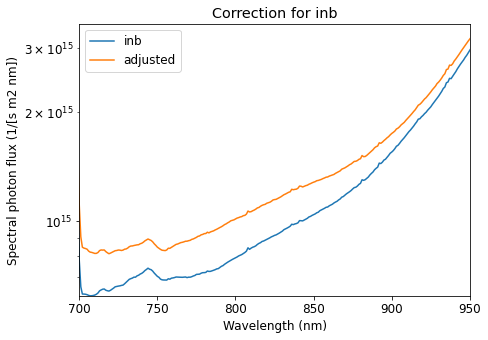

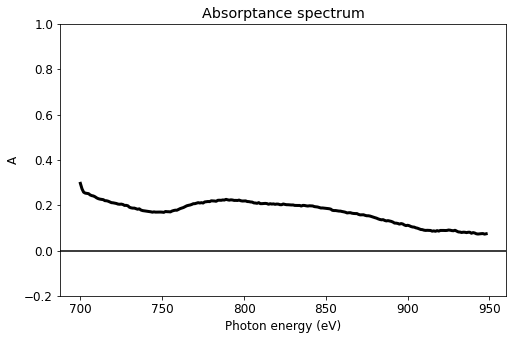

The inbeam/outofbeam adjust factor is 2.12e+01


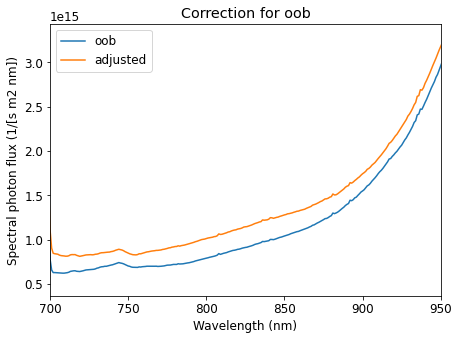

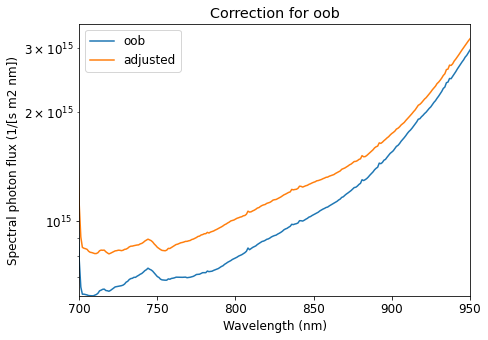

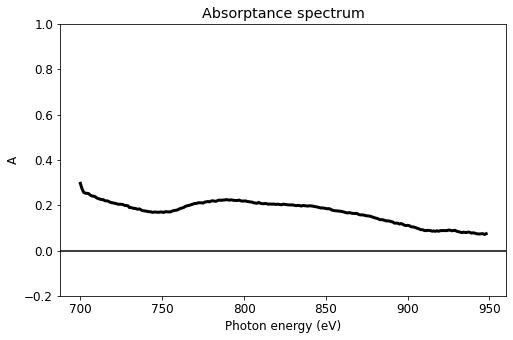

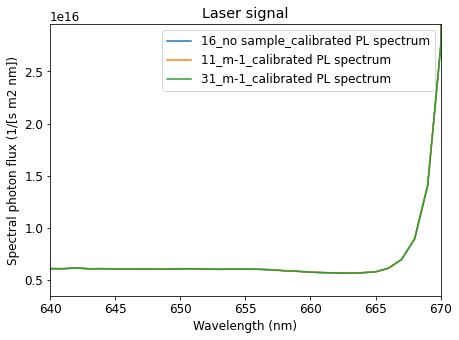

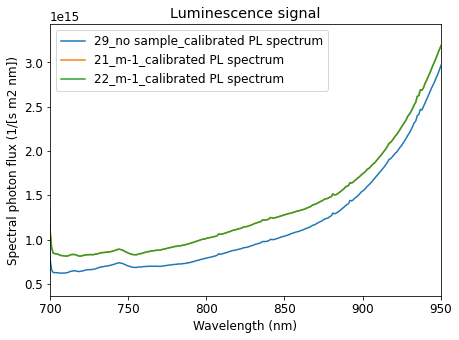

La = 2.02e+17 1/(s m2)
Lb = 2.02e+17 1/(s m2)
Lc = 2.02e+17 1/(s m2)
Pa = 0.00e+00 1/(s m2)
Pb = 3.35e+17 1/(s m2)
Pc = 3.35e+17 1/(s m2)
A = 1 - Lc/Lb = 0.0 %
PLQY = (Pc - (1 - A) * Pb) / (La * A) = 5.60e-02

5 ____________________________
fto-2id
fto-2id--ip_outofbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_650BPF.csv
fto-2id--ip_inbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_650BPF.csv
fto-2id--ip_outofbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_700LPF.csv
fto-2id--ip_inbeam--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_700LPF.csv
fto-2id--fs--laser_657nm_3.5mW_OD1--Andor_0.1s_100acc_300lmm_center850nm_700LPF.csv


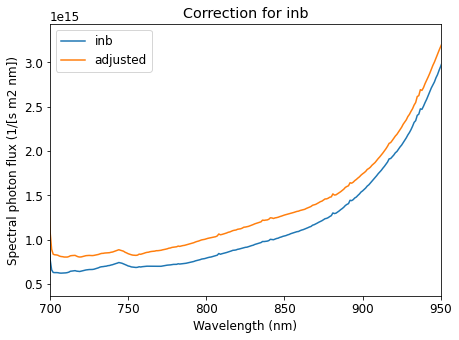

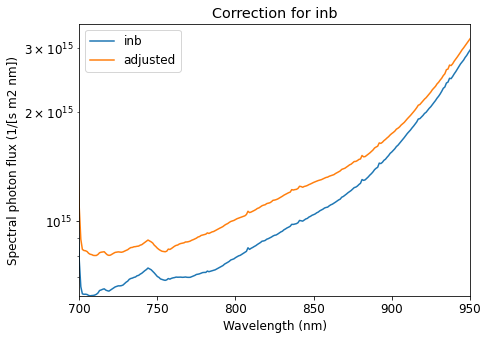

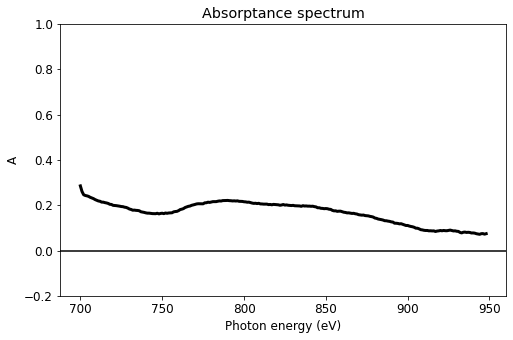

The inbeam/outofbeam adjust factor is 2.12e+01


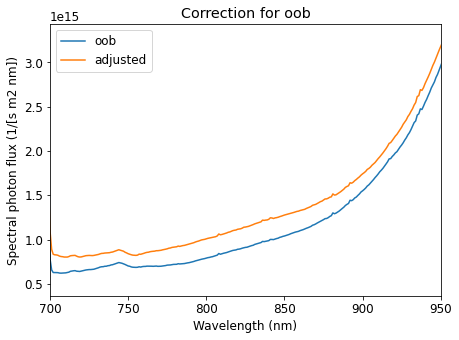

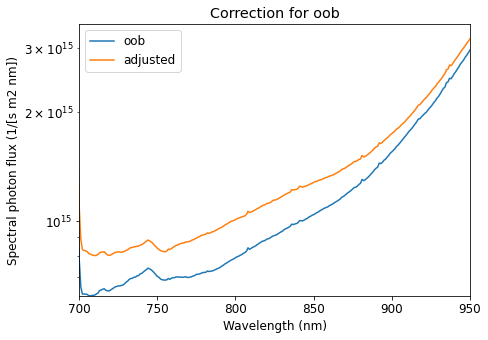

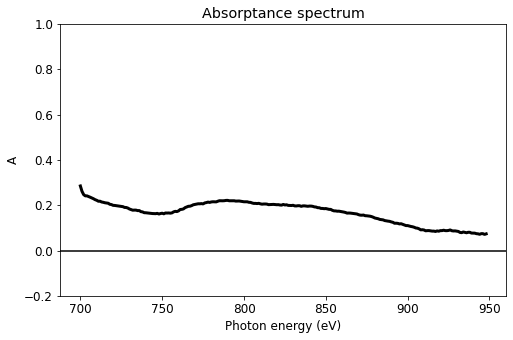

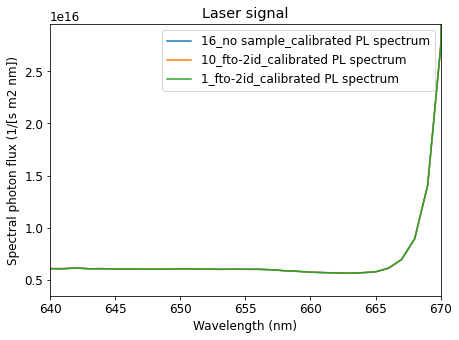

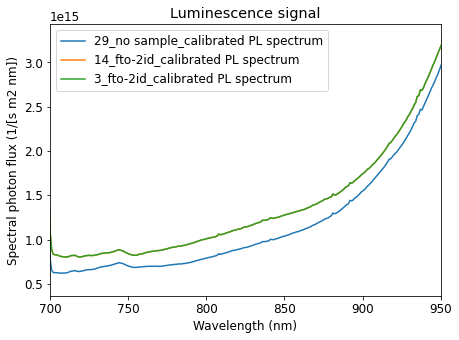

La = 2.02e+17 1/(s m2)
Lb = 2.02e+17 1/(s m2)
Lc = 2.01e+17 1/(s m2)
Pa = 0.00e+00 1/(s m2)
Pb = 3.34e+17 1/(s m2)
Pc = 3.34e+17 1/(s m2)
A = 1 - Lc/Lb = 0.1 %
PLQY = (Pc - (1 - A) * Pb) / (La * A) = 2.78e+00


In [43]:
# You can change maxNumberOutputs in settings: click on Menu bar → Settings → Advanced Settings Editor → Notebook → set maxNumberOutputs in the User Preferences tab, like:
# {
#     "maxNumberOutputs": 0
# }

#idx = 0
#param.eval_Pb = True
show_details = (True and db.dev_mode())
save_plots = (False or not db.dev_mode())

for idx in range(len(names)):
    sample_name = names[idx]

    if show_details:
        print(f'\n{idx:} ____________________________')
        print(sample_name)

    group = thot.filter({'metadata.name': sample_name}, samples)
    Lb = lqy.find(
        {'metadata.em_filter': param.laser_marker, 'metadata.inboob': 'outofbeam'},
        group,
        show_details = show_details
    )
    
    Lc = lqy.find(
        {'metadata.em_filter': param.laser_marker, 'metadata.inboob': 'inbeam'},
        group,
        show_details = show_details
    )
    
    Pb = lqy.find(
        {'metadata.em_filter': param.PL_marker, 'metadata.inboob': 'outofbeam'},
        group,
        show_details = show_details
    )
    
    Pc = lqy.find(
        {'metadata.em_filter': param.PL_marker, 'metadata.inboob': 'inbeam'},
        group,
        show_details = show_details
    )
    
    fs = lqy.find(
        {'metadata.em_filter': param.PL_marker, 'metadata.fsip': 'fs'},
        group,
        show_details = show_details
    )

    missing = []
    if Lb is None:
        missing.append('Lb')
    
    if Lc is None:
        missing.append('Lc')
        
    if fs is None:
        missing.append('fs')
    
    if Pc is None:
        missing.append('Pc')
    
    if (Pb is None) and (param.eval_Pb == True):
        missing.append('Pb')
    
    if len(missing):
        warnings.warn(
            f"{missing} is missing for sample {sample_name}, PLQY can't be evaluated!"
        )
        
        continue

    sPL = lqy.PLQY_dataset(db, La, Lb, Lc, Pa, Pb, Pc, fs, sample_name, param)
    #sPL.fs.plot(yscale = 'linear', title = sPL.fs_asset.metadata['orig_fn'])

    sPL.find_PL_peak()
    sPL.inb_adjust(adj_factor = None, show_adjust_factor = False, save_plots = save_plots, show_plots = show_details)
    sPL.calc_abs(what = 'inb', save_plots = show_details, show_plot = show_details)

    if param.eval_Pb == True:
        sPL.oob_adjust(
            adj_factor = None,
            show_adjust_factor = True,
            save_plots = save_plots,
            show_plots = show_details
        )
        
        sPL.calc_abs(what = 'oob', save_plots = show_details, show_plot = show_details)

    sPL.calc_PLQY(show = show_details, show_plots = show_details, save_plots = save_plots, show_lum = 'linear')
    sPL.abs_pf_spec(nsuns = 1)
    sPL.save_asset()